In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv


In [2]:
import pandas_profiling
import sys
import os
import math
import numpy.random as nr
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as skpe
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import sklearn.linear_model as lm
from sklearn import tree
from sklearn import neighbors
from sklearn import ensemble
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
path="../input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv"
df=pd.read_csv(path)
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
df.drop(columns={'Unnamed: 0'},inplace=True)
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
df.shape

(16744, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


In [7]:
pandas_profiling.ProfileReport(df)

In [8]:
# Seperating movie genres 
seperated_genre=df['Genres'].str.get_dummies(',')
# Concatenating original dataframe and seperated genre dataframe
df=pd.concat([df,seperated_genre],axis=1,sort=False)

In [9]:
# Seperating movie viewing platforms

netflix_movies = df.loc[df['Netflix'] == 1]
hulu_movies = df.loc[df['Hulu'] == 1]
prime_video_movies = df.loc[df['Prime Video'] == 1]
disney_movies = df.loc[df['Disney+'] == 1]

# Dropping other platforms 
netflix_movies.drop(['Hulu', 'Prime Video', 'Disney+', 'Type','Genres'], axis = 1,inplace=True)
hulu_movies.drop(['Netflix', 'Prime Video', 'Disney+', 'Type','Genres'], axis = 1,inplace=True)
prime_video_movies.drop(['Hulu', 'Netflix', 'Disney+', 'Type','Genres'], axis = 1,inplace=True)
disney_movies.drop(['Hulu', 'Prime Video', 'Netflix', 'Type','Genres'], axis = 1,inplace=True)

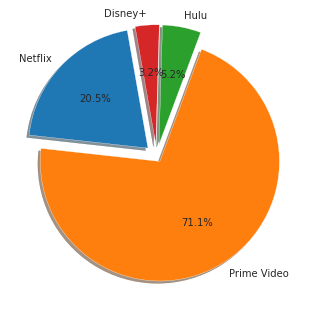

In [10]:
# Pie chart for depicting movie distribution by platforms
# Calculating how much movies are from which platform
total_netflix=len(netflix_movies.index)
total_prime=len(prime_video_movies.index)
total_hulu=len(hulu_movies.index)
total_disney=len(disney_movies.index)

labels=['Netflix','Prime Video','Hulu','Disney+']
sizes=[total_netflix,total_prime,total_hulu,total_disney]
explode=(0.1,0.05,0.1,0.1)

fig,ax=plt.subplots()
ax.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 100)
plt.show()

In [11]:
# Getting movies having 8+ IMDb ratings
movie_rating_netflix=netflix_movies['IMDb']>8
print('Total movies on Netflix with more than 8+ rating(IMDb :',movie_rating_netflix.sum())

movie_rating_disney=disney_movies['IMDb']>8
print('Total movies on Disney+ with more than 8+ rating(IMDb :',movie_rating_disney.sum())

movie_rating_prime=prime_video_movies['IMDb']>8
print('Total movies on Prime Video with more than 8+ rating(IMDb :',movie_rating_prime.sum())

movie_rating_hulu=hulu_movies['IMDb']>8
print('Total movies on Hulu with more than 8+ rating(IMDb :',movie_rating_hulu.sum())

Total movies on Netflix with more than 8+ rating(IMDb : 129
Total movies on Disney+ with more than 8+ rating(IMDb : 21
Total movies on Prime Video with more than 8+ rating(IMDb : 324
Total movies on Hulu with more than 8+ rating(IMDb : 23


Text(0.5, 1.0, 'Platform with most movies rated above 8+ (IMDB)')

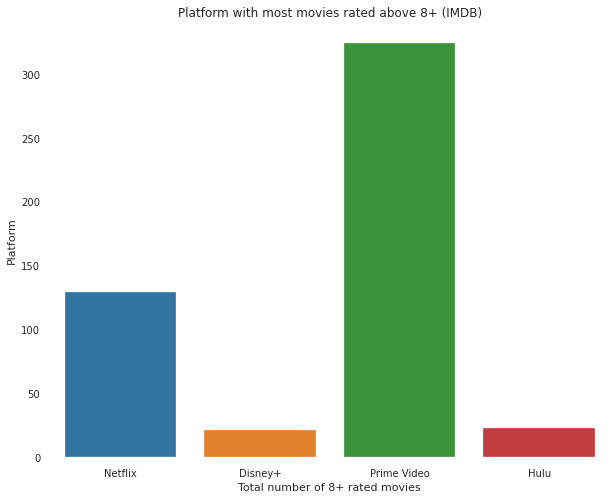

In [12]:
# Creating a dataframe having movies with 8+ ratings on IMDb
top_rated_df=pd.DataFrame({'Platforms':['Netflix','Disney+','Prime Video','Hulu'],'Movies':[movie_rating_netflix.sum(),movie_rating_disney.sum(),movie_rating_prime.sum(),movie_rating_hulu.sum()]})
# Visualizing this dataframe
plt.figure(figsize=(10,8))
sns.barplot(x=top_rated_df['Platforms'],y=top_rated_df['Movies'],data=top_rated_df)
plt.ylabel('Platform')
plt.xlabel('Total number of 8+ rated movies')
plt.title('Platform with most movies rated above 8+ (IMDB)')

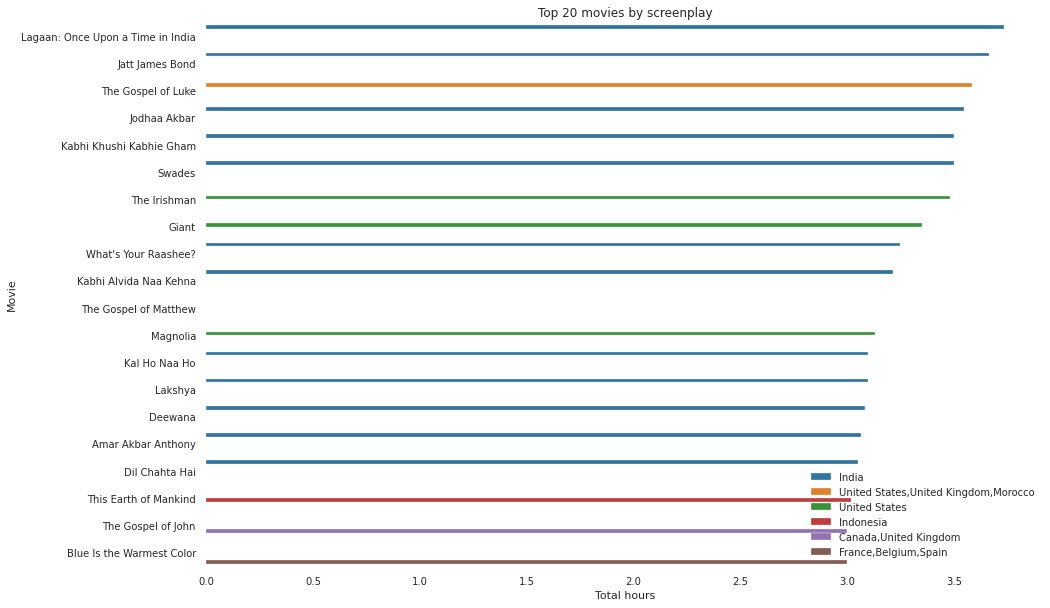

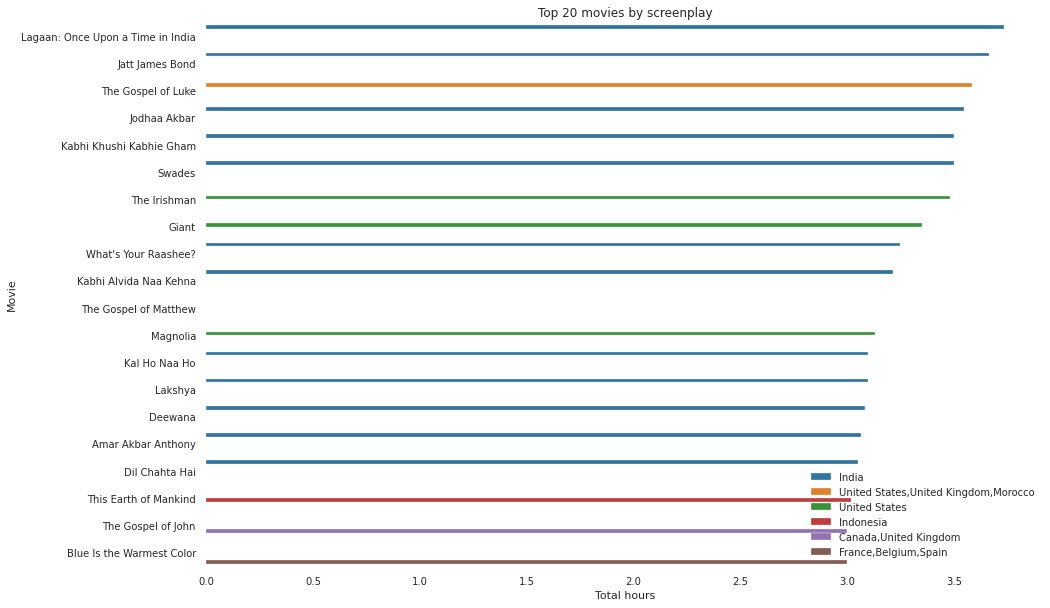

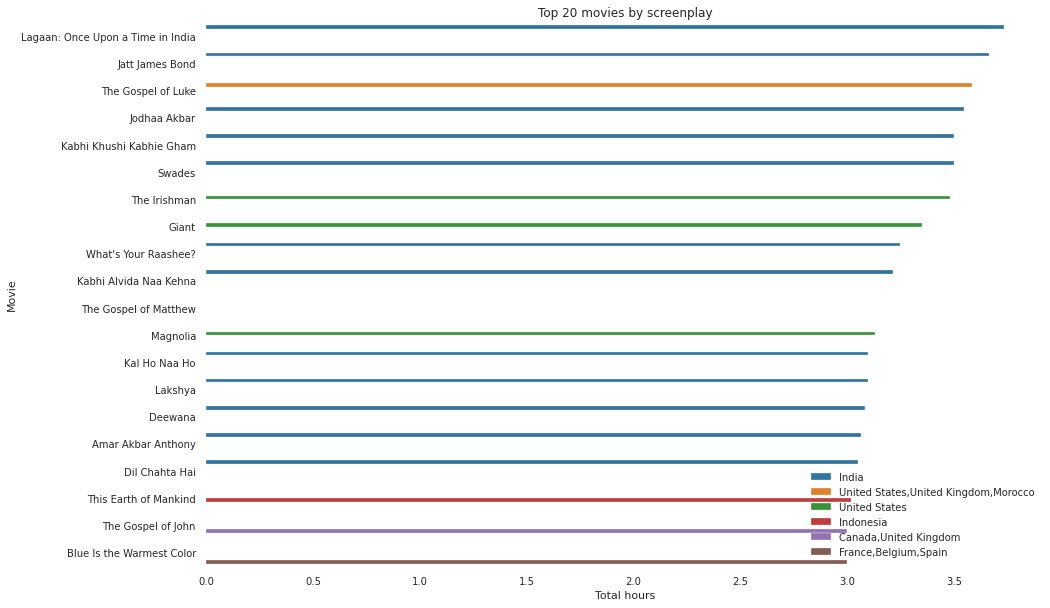

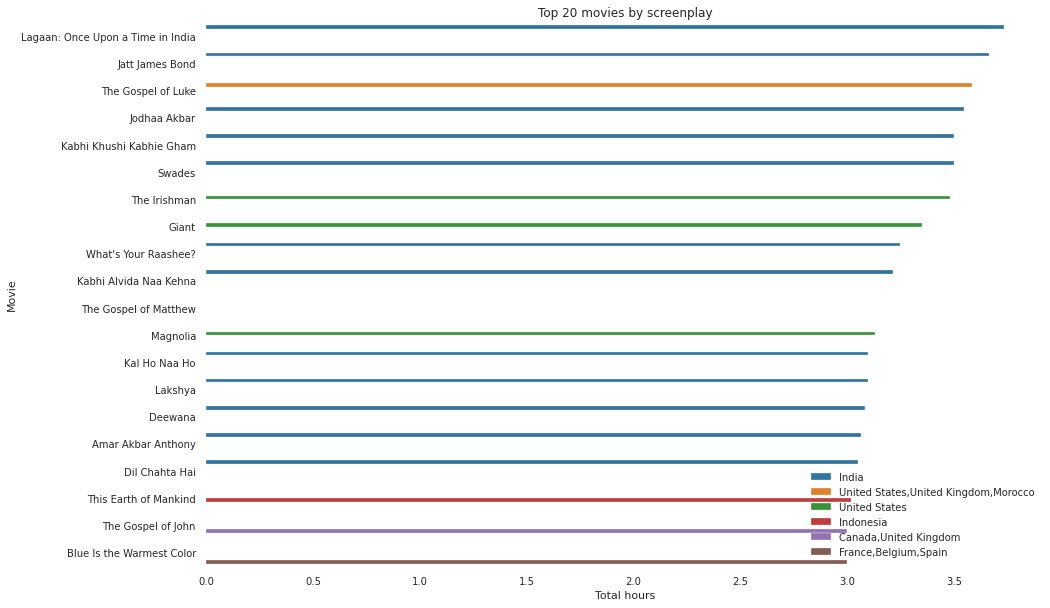

In [13]:
# Getting screenplay in hours
netflix_movies['screenplay'] = netflix_movies['Runtime']/60
hulu_movies['screenplay'] = hulu_movies['Runtime'] / 60
prime_video_movies['screenplay'] = prime_video_movies['Runtime'] / 60
disney_movies['screenplay'] = disney_movies['Runtime'] / 60


# Creating function to get screenplay of top 20 movies on desired platform
def top_20_sp(platform):
    top_20_screenplay=netflix_movies.sort_values(by='screenplay',ascending=False).head(20)
    plt.figure(figsize=(15,10))
    sns.barplot(x='screenplay',y='Title',data=top_20_screenplay,hue='Country')
    plt.legend(loc='lower right')
    plt.xlabel('Total hours')
    plt.ylabel('Movie')
    plt.title('Top 20 movies by screenplay')
    plt.show()
    
top_20_sp(netflix_movies)
top_20_sp(disney_movies)
top_20_sp(prime_video_movies)
top_20_sp(hulu_movies)

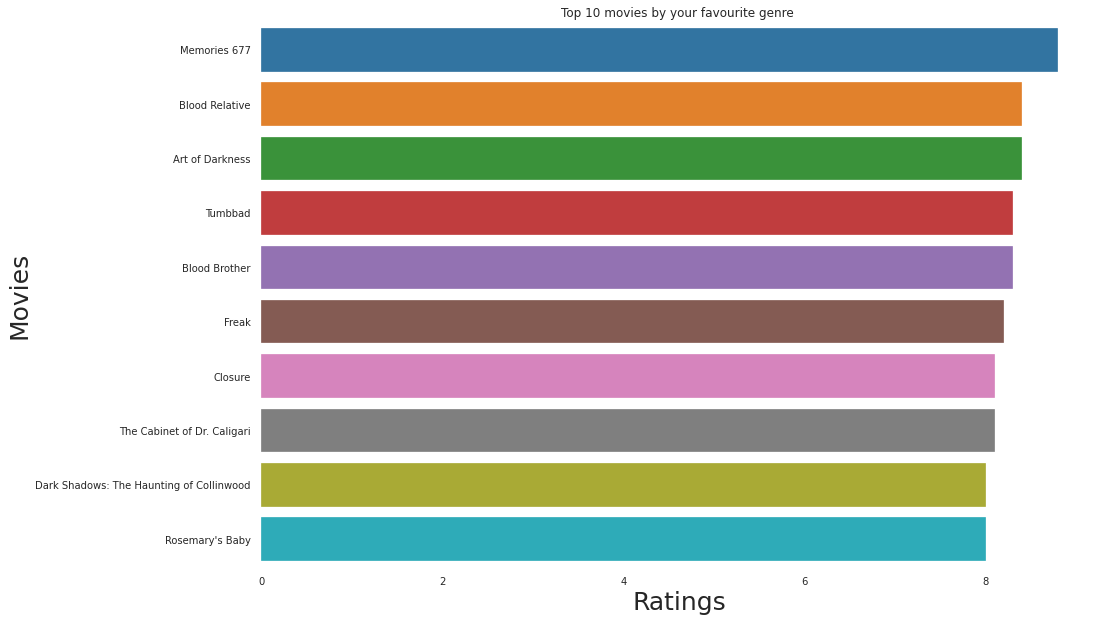

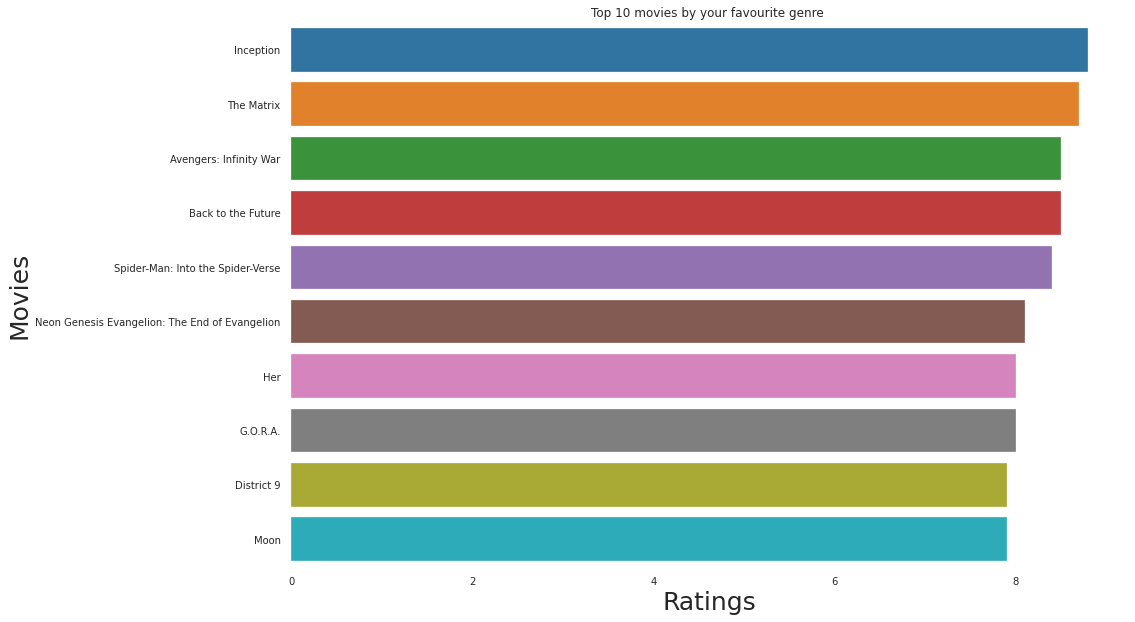

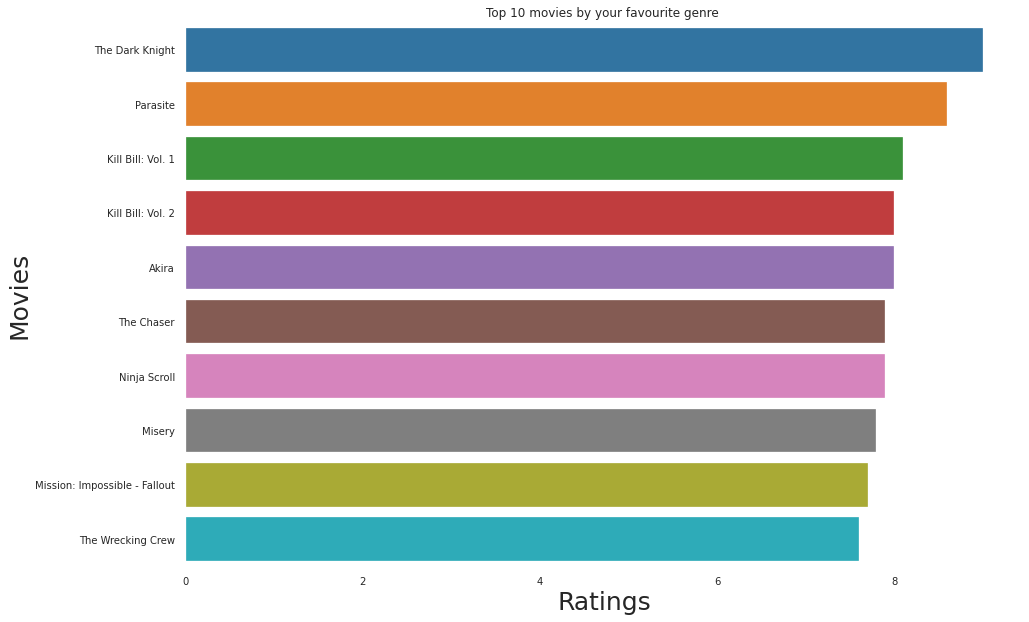

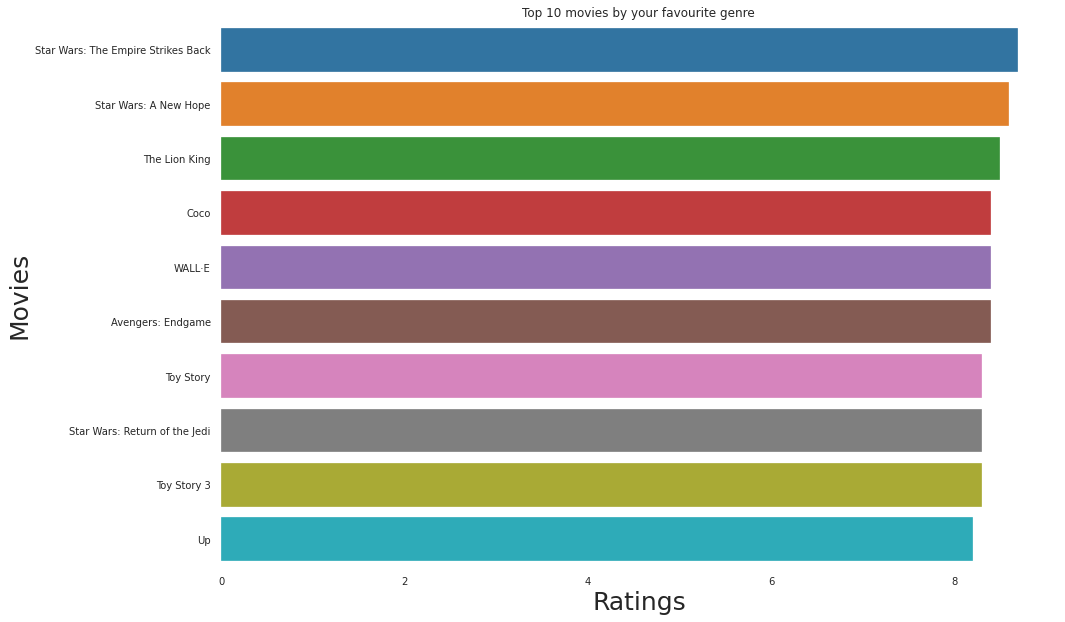

In [14]:
# Function for getting top n movies by your favourite genre on your favourite platform
def top_rated(genre,platform,n_top):
    genre=platform.loc[platform[genre]==1]

    top_n_movies=genre.sort_values(by='IMDb',ascending=False).head(n_top)

    plt.figure(figsize=(15,10))
    sns.barplot(x='IMDb',y='Title',data=top_n_movies)
    plt.xlabel('Ratings',FontSize=25)
    plt.ylabel('Movies',FontSize=25)
    plt.title('Top {} movies by your favourite genre '.format(n_top))
    plt.show()

top_rated('Horror',prime_video_movies,10)
top_rated('Sci-Fi',netflix_movies,10)
top_rated('Thriller',hulu_movies,10)
top_rated('Adventure',disney_movies,10)